# Project 2: Credit Risk and Statistical Learning

**Names of all group members:**
- Jonathan Andréasson (email@example.com)
- Firstname Lastname (email@example.com)


---

All code below is only suggestive and you may as well use different approaches.

In [ ]:
# Exercise 1.
import numpy as np
import sklearn
np.random.seed(32)  # for reproducibility

# simulate explanatory variables x


# a) calculate empirical means and standard deviations over training data


# b) Suggest other variables that would realistically be relevant in credit scoring.
# (you do not have to implement those of course, just explain your answer in writing)


In [ ]:
#params 
m = 20000
n = 10000


In [ ]:
x_1 = np.array([np.random.uniform(18,80) for _ in range(m+n)])
x_2 = np.array([np.random.uniform(1,15) for _ in range(m+n)])
x_3 = np.array([int(np.random.uniform(0,1)>0.1) for _ in range(m+n)])

x = np.array([x_1,x_2,x_3])


In [ ]:
print(x[0][0],x[1][0],x[2][0])
print(x.shape)

In [ ]:
mu_x1 = np.mean(x_1[:m])
mu_x2 = np.mean(x_2[:m])
mu_x3 = np.mean(x_3[:m])

sigma_x1 = np.std(x_1[:m])
sigma_x2 = np.std(x_2[:m])
sigma_x3 = np.std(x_3[:m])

In [ ]:
print(mu_x1,mu_x2,mu_x3)
print(sigma_x1,sigma_x2,sigma_x3)

Other interesting parameters might be: education level, loans and assets

In [ ]:
# Exercise 2.
# Building the datasets:

sigmoid = lambda x: 1. / (1. + np.exp(-x))

# build the first dataset

# build the second dataset



In [ ]:
xi = [np.random.uniform(0,1) for _ in range(n+m)]
p1 = lambda x1,x2,x3: sigmoid(13.3 -0.33*x1+3.5*x2-3*x3)
p2 = lambda x1,x2,x3: sigmoid(5-10*(int(x1<25)+int(x1>75))+1.1*x2-x3)

In [ ]:
y1 = [int(xi[i]<=p1(x_1[i],x_2[i],x_3[i])) for i in range(m+n)]
y2 = [int(xi[i]<=p2(x_1[i],x_2[i],x_3[i])) for i in range(m+n)]

x = np.column_stack(x)
d1 = [x,y1]
d2 = [x,y2]

In [ ]:
print(len(d1))
print(len(d1[0]))
print(type(d1[0][0]))
print(d1[0][0].shape)
print(len(d1[1]))


In [ ]:
phat1, phat2 = sklearn.linear_model.LogisticRegression(), sklearn.linear_model.LogisticRegression()


phat1.fit(d1[0][:m],d1[1][:m])
phat2.fit(d2[0][:m],d2[1][:m])

In [ ]:
y1_train_probs = phat1.predict_proba(x[:m])
loss1 = sklearn.metrics.log_loss(y1[:m],y1_train_probs)

y2_train_probs = phat2.predict_proba(x[:m])
loss2 = sklearn.metrics.log_loss(y2[:m],y2_train_probs)


print(loss1, loss2)

In [ ]:
y1_test_probs = phat1.predict_proba(x[m:])
loss1 = sklearn.metrics.log_loss(y1[m:],y1_test_probs)

y2_test_probs = phat2.predict_proba(x[m:])
loss2 = sklearn.metrics.log_loss(y2[m:],y2_test_probs)


print(loss1, loss2)

In [ ]:
# Exercise 2. a)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
# "model = LogisticRegression().fit(X_data, Y_data)" fits a model
# "pred_X = model.predict_proba(X)" evaluates the model
# (note that it outputs both P(Y=0|X) and P(Y=1|X))
# "log_loss(Y, pred_X)" evaluates the negative conditional log likelihood (also called cross-entropy loss)

# Fit the models on both datasets


# Calculate cross-entropy loss on both datasets for train and test



In [ ]:
# Exercise 2.b)
# Calculate normalized data
x = [x_1/sigma_x1, x_2/sigma_x2, x_3/sigma_x3]

x = np.column_stack(x)

In [ ]:
# Exercise 2.b)
from sklearn.svm import SVC
# "model = SVC(kernel='rbf', gamma=GAMMA, C=C, probability=True)" creates
# a model with kernel exp(-GAMMA \|x-x'\|_2^2) and regul. parameter C (note the relation between C and the parameter lambda).
# "probability=True" enables the option "model.predict_proba(X)" to predict probabilities from the regression function \hat{f}^{svm}.
# "model.fit(X, Y)" optimizes the model parameters (using hinge loss)

# Fit the models for both datasets (this can take up to 60 seconds with SVC)
lambda_ = 5/(2*m)
C = 1/lambda_
GAMMA = 1/10
model1 = SVC(kernel='rbf', gamma = GAMMA, C=C, probability=True)
model1.fit(x[:m],y1[:m])


model2 = SVC(kernel='rbf', gamma = GAMMA, C=C, probability=True)
model2.fit(x[:m],y2[:m])


In [ ]:
# Exercise 2.b)
# "model.predict_proba(X)" predicts probabilities from features (note that it outputs both P(Y=0|X) and P(Y=1|X))

# Calculate cross-entropy loss on both datasets for train and test
train_scores1 = model1.predict_proba(x[:m])
train_scores2 = model2.predict_proba(x[:m])

train_closs1 = sklearn.metrics.log_loss(y1[:m],train_scores1)
train_closs2 = sklearn.metrics.log_loss(y2[:m],train_scores2)

print(train_closs1, train_closs2)

test_scores1 = model1.predict_proba(x[m:])
test_scores2 = model2.predict_proba(x[m:])

test_closs1 = sklearn.metrics.log_loss(y1[m:],test_scores1)
test_closs2 = sklearn.metrics.log_loss(y2[m:],test_scores2)

print(test_closs1, test_closs2)


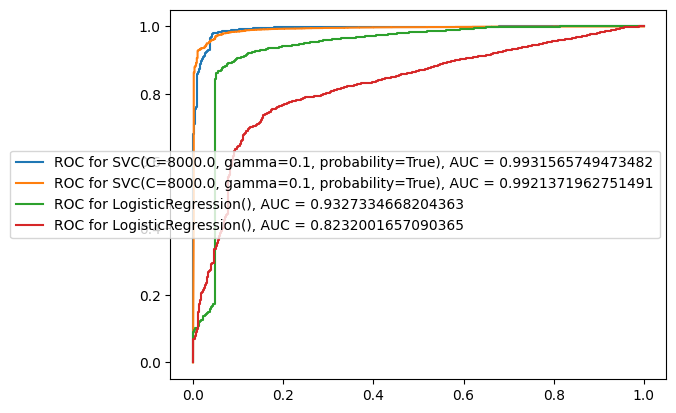

In [44]:
# Exercise 2.c)
import matplotlib.pyplot as plt

# To calculate the curves, it is fine to take 100 threshold values c, i.e.,
ths = np.linspace(0, 1, 100)

# To approximately calculate the AUC, it is fine to simply use Riemann sums.
# This means, if you have 100 (a_i, b_i) pairs for the curves, a_1 <= a_2 <= ...
# then you may simply use the sum
# sum_{i=1}^99 (b_i + b_{i+1})/2 * (a_{i+1}-a_i)
# as the approximation of the integral (or AUC)


# first data set & logistic regression:
# (the code should be reusable for all cases, only exchanging datasets and predicted probabilities depending on the model)

# Compute and plot the ROC and AUC cruves
def roc_auc(model, input, labels):
    scores = model.predict_proba(input)[:,1]
    f,t,thr = sklearn.metrics.roc_curve(labels, scores)
    auc = sklearn.metrics.roc_auc_score(labels, scores)
    plt.plot(f,t, label = f'ROC for {model}, AUC = {auc}')
    plt.legend()
    # plt.show()
    return
input = x[m:]

roc_auc(model1,input,y1[m:] )
roc_auc(model2,input,y2[m:] )
roc_auc(phat1,input,y1[m:] )
roc_auc(phat2,input,y2[m:] )


# y1_score = model1.predict_proba(x[m:])[:,1]
# f,t, thr = sklearn.metrics.roc_curve(y1[m:], y1_score)
# auc = sklearn.metrics.roc_auc_score(y1[m:],y1_score)
# plt.plot(f,t, label = f'ROC, AUC = {auc}')
# plt.legend()
# plt.show()
# second data set & logistic regression:


# first data set and SVM:


# second data set and SVM:

In [ ]:
# Exercise 3.

# Set model parameters and define matrix D


# Scenario 1:
# Define Portfolio and possible outcomes for this portfolio using matrix D


# Plot the histogram of profits and losses


# Calculate expected profit and losses, compute 95%-VaR and 95%-ES


# Scenario 2:
# Define Portfolio and possible outcomes using the matrix D and the predicted default probabilities from the logistic regression model


# Plot the histogram of profits and losses


# Calculate expected profit and losses, compute 95%-VaR and 95%-ES


# Scenario 3:
# Define Portfolio and possible outcomes using the matrix D and the predicted default probabilities from the SVM model


# Plot the histogram of profits and losses


# Calculate expected profit and losses, compute 95%-VaR and 95%-ES